In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
data=pd.read_csv('../MachineLearning/datasets/ADO April 2023 - Inflation.csv',encoding='latin-1')

In [4]:
data.head()

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN


In [5]:
data_null=data.isnull().sum()
print(data_null)

RegionalMember          0
Year                    0
Inflation               6
Unit of Measurement     0
 Subregion             14
 Country Code          49
dtype: int64


In [6]:
data_percent=(data_null/len(data))*100
print(data_percent)

RegionalMember          0.000000
Year                    0.000000
Inflation               1.617251
Unit of Measurement     0.000000
 Subregion              3.773585
 Country Code          13.207547
dtype: float64


In [7]:
data_duplicate=data[data.duplicated()]
print(data_duplicate)

Empty DataFrame
Columns: [RegionalMember, Year, Inflation, Unit of Measurement,  Subregion,  Country Code]
Index: []


In [8]:
rows,colums=data.shape
print('row',rows)
print('columns',colums)


row 371
columns 6


In [10]:
column_name='Inflation'
column=data[column_name]
mean=column.mean()
print(mean)

median=column.median()
print(median)

mode=column.mode()
print(mode)

4.728767123287671
3.7
0    2.0
Name: Inflation, dtype: float64


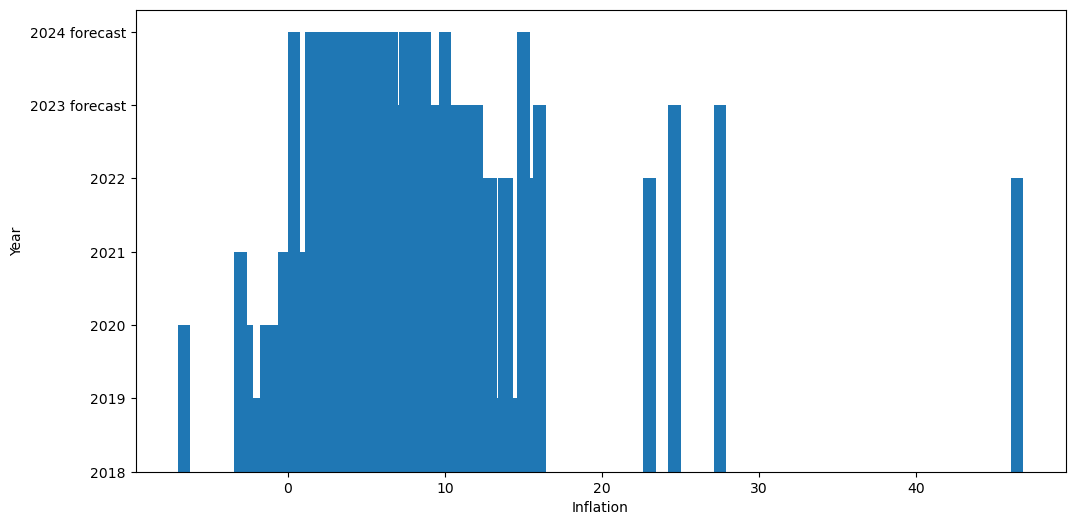

In [11]:
x_column='Inflation'
y_column='Year'

plt.figure(figsize=(12,6))
plt.bar(data[x_column],data[y_column])
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

<AxesSubplot:xlabel='Inflation', ylabel='Year'>

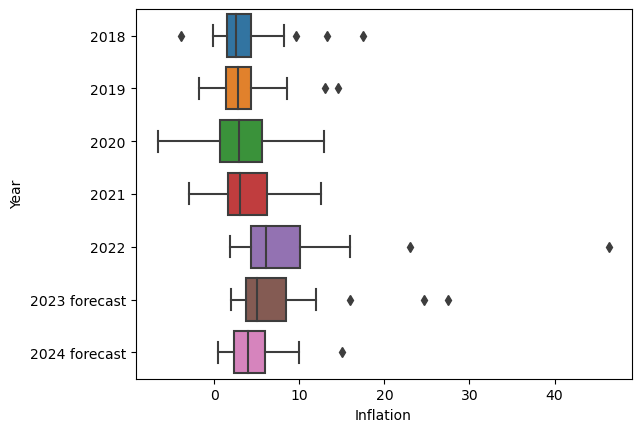

In [12]:
sns.boxplot(data=data,x=x_column,y=y_column)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionalMember       371 non-null    object 
 1   Year                 371 non-null    object 
 2   Inflation            365 non-null    float64
 3   Unit of Measurement  371 non-null    object 
 4    Subregion           357 non-null    object 
 5    Country Code        322 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.5+ KB


In [14]:
data.describe()

,Inflation
count,365.000000
mean,4.728767
std,4.555189
min,-6.600000
25%,2.200000
50%,3.700000
75%,6.200000
max,46.400000


In [15]:
data.head()

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN


count    365.000000
mean       4.728767
std        4.555189
min       -6.600000
25%        2.200000
50%        3.700000
75%        6.200000
max       46.400000
Name: Inflation, dtype: float64


d:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inflation', ylabel='Density'>

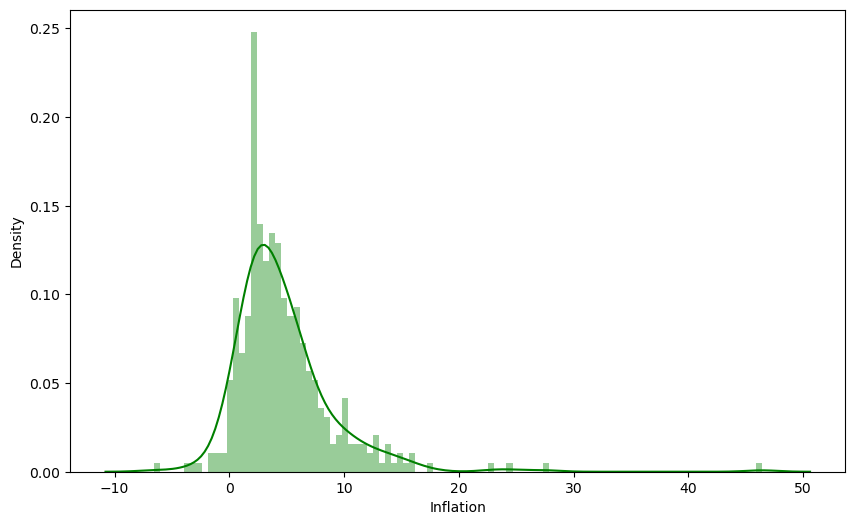

In [16]:
print(data['Inflation'].describe())
plt.figure(figsize=(10,6))
sns.distplot(data['Inflation'],color='g',bins=100,hist_kws={'alpha':0.4})

In [17]:
central_asian_countries=[
    'Afghanistan','Armenia', 'Azerbaijan', 'Kazakhstan', 'Kyrgyz Republic',
    'Tajikistan', 'Turkmenistan', 'Uzbekistan']
cenral_asian_data=data[data['RegionalMember'].isin(central_asian_countries)]

In [18]:
fig=px.line(cenral_asian_data,x='Year',y='Inflation',color='RegionalMember',title='inflation rate of central asian countries')
fig.show()

In [19]:
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asian_data=data[data['RegionalMember'].isin(south_asian_countries)]
fig=px.line(south_asian_data,x='Year',y='Inflation',color='RegionalMember',title='Inflation rate of south asian countries')
fig.show()

In [21]:
column_name=['Inflation']
column=data[column_name]
mean=column.mean()
print(mean)

fig=px.box(data,x=' Subregion',y='Inflation',title='Inflation Rates by Subregion')
fig.show()

Inflation    4.728767
dtype: float64


In [22]:
mean_inflation_by_subregion=data.groupby(' Subregion')['Inflation'].mean().reset_index()

mean_inflation_by_year=data.groupby('Year')['Inflation'].mean().reset_index()

fig=px.line(mean_inflation_by_year,x='Year',y='Inflation',title='Mean Inflation Rates by Year')
fig.show()